In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import pandas as pd
file_path='day.csv'
data=pd.read_csv(file_path)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
features=['temp','atemp','hum','windspeed']
target='cnt'

x=data[features]
y=data[target]

x,y

(         temp     atemp       hum  windspeed
 0    0.344167  0.363625  0.805833   0.160446
 1    0.363478  0.353739  0.696087   0.248539
 2    0.196364  0.189405  0.437273   0.248309
 3    0.200000  0.212122  0.590435   0.160296
 4    0.226957  0.229270  0.436957   0.186900
 ..        ...       ...       ...        ...
 726  0.254167  0.226642  0.652917   0.350133
 727  0.253333  0.255046  0.590000   0.155471
 728  0.253333  0.242400  0.752917   0.124383
 729  0.255833  0.231700  0.483333   0.350754
 730  0.215833  0.223487  0.577500   0.154846
 
 [731 rows x 4 columns],
 0       985
 1       801
 2      1349
 3      1562
 4      1600
        ... 
 726    2114
 727    3095
 728    1341
 729    1796
 730    2729
 Name: cnt, Length: 731, dtype: int64)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

y_predict=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

print(f'Mean Squred error: {mse}')
print(f'r² score: {r2}')

Mean Squred error: 2007059.4912903374
r² score: 0.4994717184081342


In [32]:
pd.DataFrame(y_test,y_pred)

,cnt
4207.360125,NaN
2627.633685,NaN
3380.995059,NaN
4023.645878,NaN
4997.675785,NaN
...,...
3415.438914,NaN
6693.188709,NaN
4108.413641,NaN
5959.511416,NaN


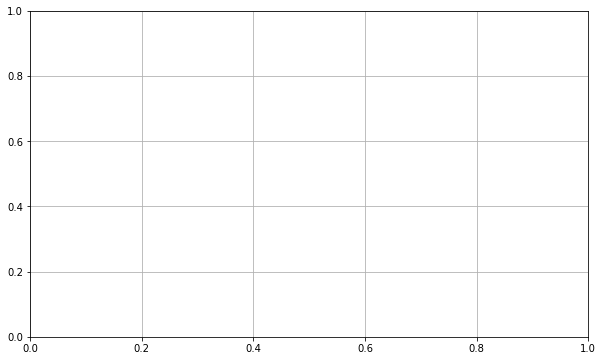

In [26]:
plt.figure(figsize=(10,6))
plt.grid()
plt.show()

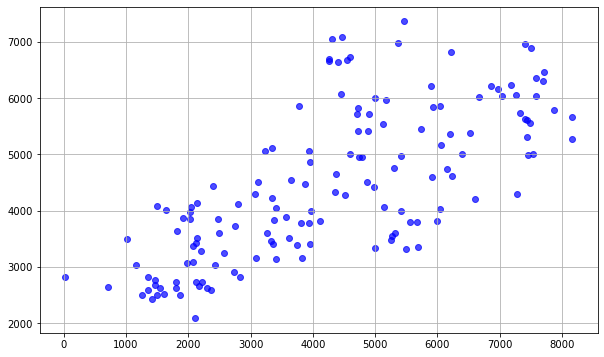

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.7,color='blue')
plt.grid()
plt.show()

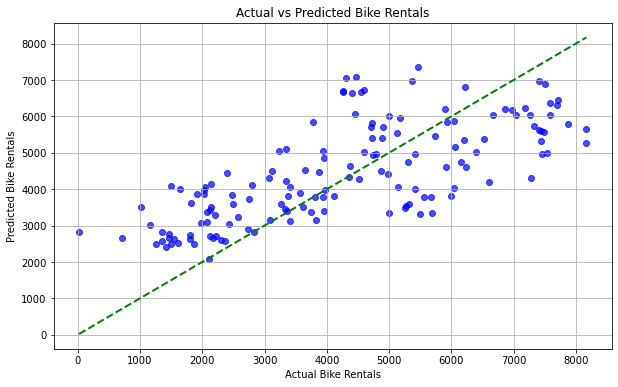

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.7,color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--g',linewidth=2)
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs Predicted Bike Rentals")

plt.grid()
plt.show()

In [42]:
import joblib

# Save the trained model
joblib.dump(model, 'bike_rental_model.pkl')
print("Model saved as 'bike_rental_model.pkl'")


Model saved as 'bike_rental_model.pkl'
